<a href="https://colab.research.google.com/github/Ruthuja-Gaikwad/AIML/blob/main/2118.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
import pandas as pd
df=pd.read_csv("/content/Test.csv")
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [5]:

column_names = list(df.columns)

# Print each column name
for column in column_names:
    print(column)


Item_Identifier
Item_Weight
Item_Fat_Content
Item_Visibility
Item_Type
Item_MRP
Outlet_Identifier
Outlet_Establishment_Year
Outlet_Size
Outlet_Location_Type
Outlet_Type


In [6]:
target=df['Item_MRP']
df['Outlet_Location_Type'].replace({'Tier 1': 0, 'Tier 2': 1,'Tier 3':2}, inplace=True)
df['Item_Fat_Content'].replace({'LF': 0, 'Low Fat': 1,'low fat':2,'Regular':3,'reg':4}, inplace=True)
df['Outlet_Size'].replace({'High': 0, 'Medium':1,'Small':2}, inplace=True)
column_to_drop=['Outlet_Type','Item_MRP','Item_Type','Item_Identifier','Outlet_Identifier']
features=df.drop(columns=column_to_drop)

In [7]:
print(df)

     Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0              FDW58       20.750                 1         0.007565   
1              FDW14        8.300                 4         0.038428   
2              NCN55       14.600                 1         0.099575   
3              FDQ58        7.315                 1         0.015388   
4              FDY38          NaN                 3         0.118599   
...              ...          ...               ...              ...   
5676           FDB58       10.500                 3         0.013496   
5677           FDD47        7.600                 3         0.142991   
5678           NCO17       10.000                 1         0.073529   
5679           FDJ26       15.300                 3         0.000000   
5680           FDU37        9.500                 3         0.104720   

               Item_Type  Item_MRP Outlet_Identifier  \
0            Snack Foods  107.8622            OUT049   
1                  Dair

In [8]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Assuming features is your NumPy array
features_df = pd.DataFrame(features)  # Convert NumPy array to DataFrame

# Replace NaN with a specific value (e.g., 0)
features_df_filled = features_df.fillna(value=0)

# Or, use SimpleImputer for more advanced imputation techniques
imputer = SimpleImputer(strategy='mean')
features_filled = imputer.fit_transform(features)


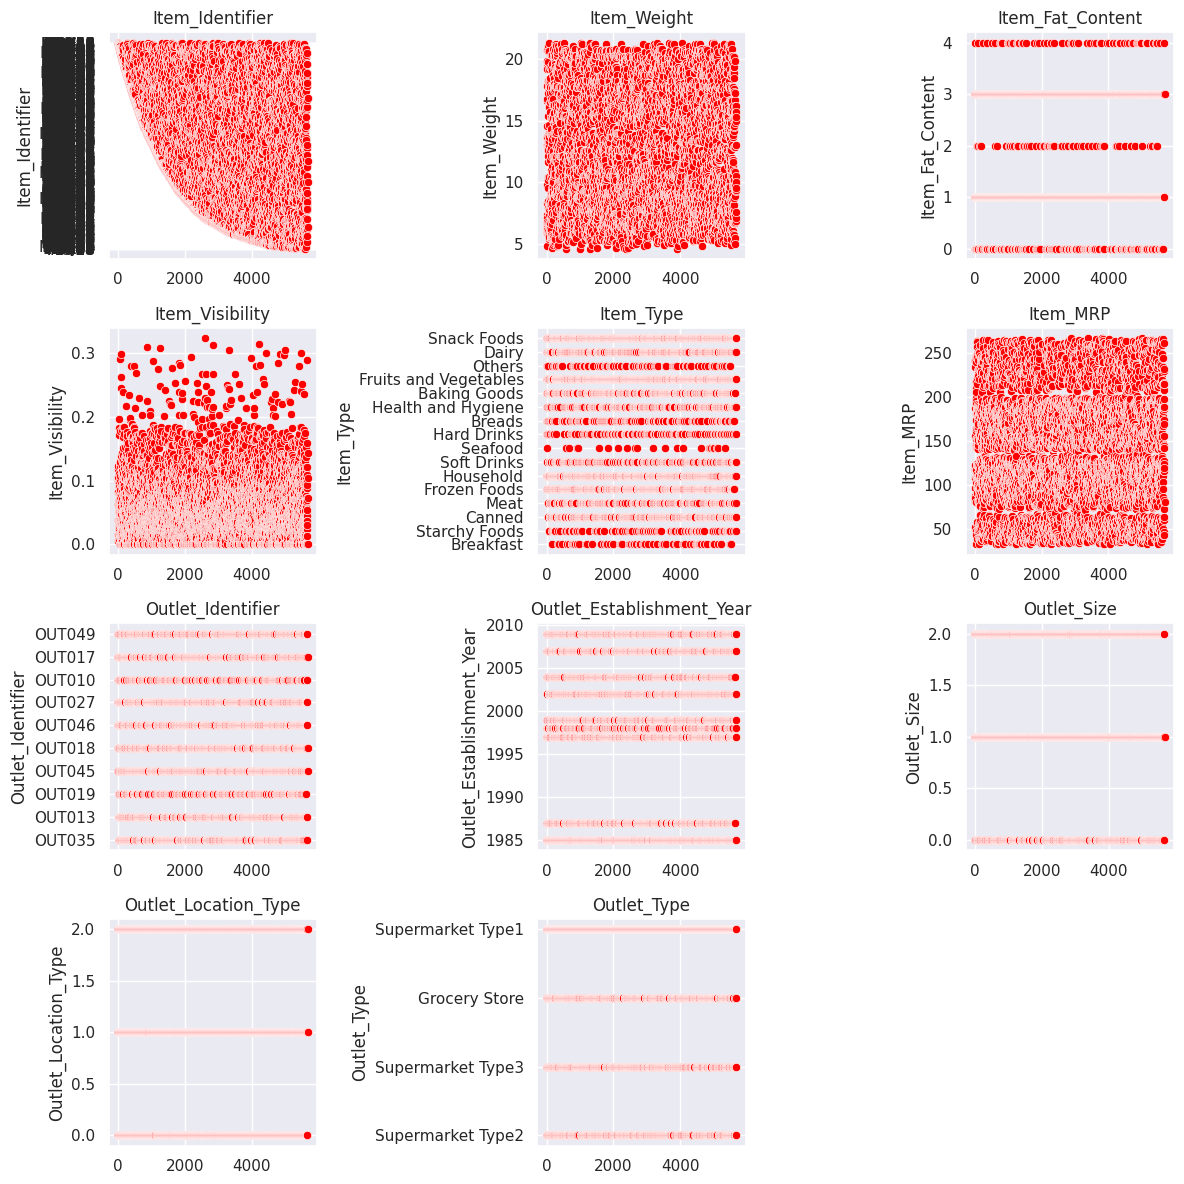

      Item_Weight  Item_Fat_Content  Item_Visibility  \
0          20.750                 1         0.007565   
1           8.300                 4         0.038428   
2          14.600                 1         0.099575   
3           7.315                 1         0.015388   
4             NaN                 3         0.118599   
...           ...               ...              ...   
5676       10.500                 3         0.013496   
5677        7.600                 3         0.142991   
5678       10.000                 1         0.073529   
5679       15.300                 3         0.000000   
5680        9.500                 3         0.104720   

      Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  
0                          1999          1.0                     0  
1                          2007          NaN                     1  
2                          1998          NaN                     2  
3                          2007          NaN       

In [9]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sns
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.1, random_state=20)
sns.set()
df.head()
df.describe()
num_cols = len(df.columns)
num_rows = (num_cols + 2) // 3

fig, axes = plt.subplots(num_rows, 3, figsize=(12, 3 * num_rows))
axes = axes.flatten()
for i, column in enumerate(df.columns):
    ax = axes[i]
    sns.scatterplot(df[column], ax=ax, color = "red")
    ax.set_title(column)

for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()
x=features
y=df['Item_MRP']
print(x)
print(y)
scalar=MinMaxScaler()#normalized
scalar.fit(x)
x_scaled=scalar.transform(x)
print(x_scaled)
features=x_scaled
target=df['Item_MRP']
print(features)
print(target)

In [10]:
print("X.SHAPE=",x.shape)
print("X_TEST.SHAPE=",x_test.shape)
print("X_TRAIN.SHAPE=",x_train.shape)
print("Y_TEST.SHAPE=",y_test.shape)
print("Y_TRAIN.SHAPE=",y_train.shape)

X.SHAPE= (5681, 6)
X_TEST.SHAPE= (569, 6)
X_TRAIN.SHAPE= (5112, 6)
Y_TEST.SHAPE= (569,)
Y_TRAIN.SHAPE= (5112,)


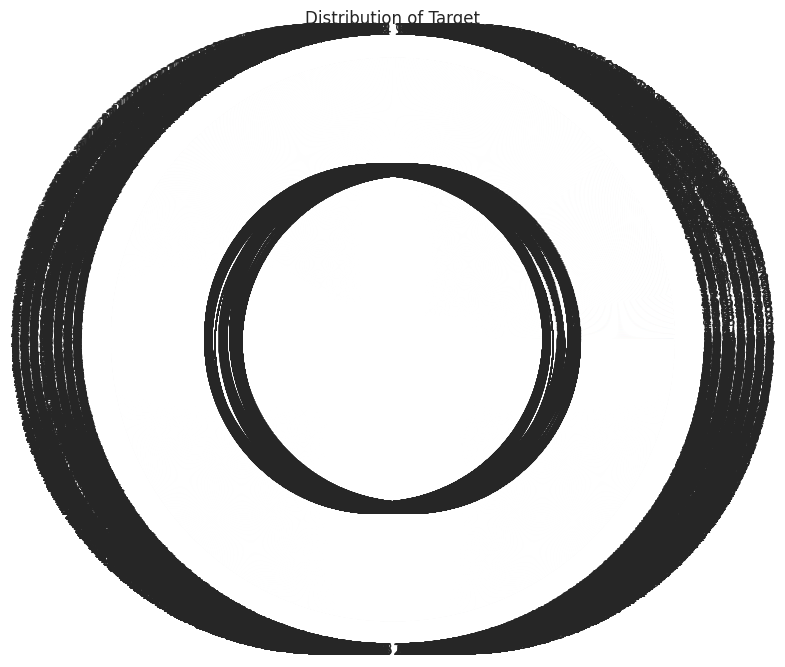

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv('/content/Test.csv')

# Create a pie chart
plt.figure(figsize=(8, 8))
data['Item_MRP'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of Target')
plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.

plt.show()  # Display the pie chart

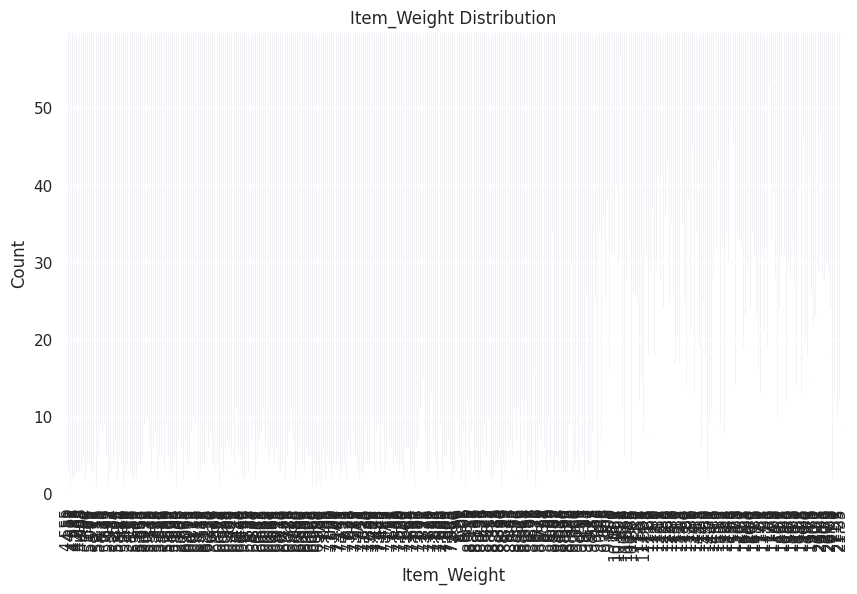

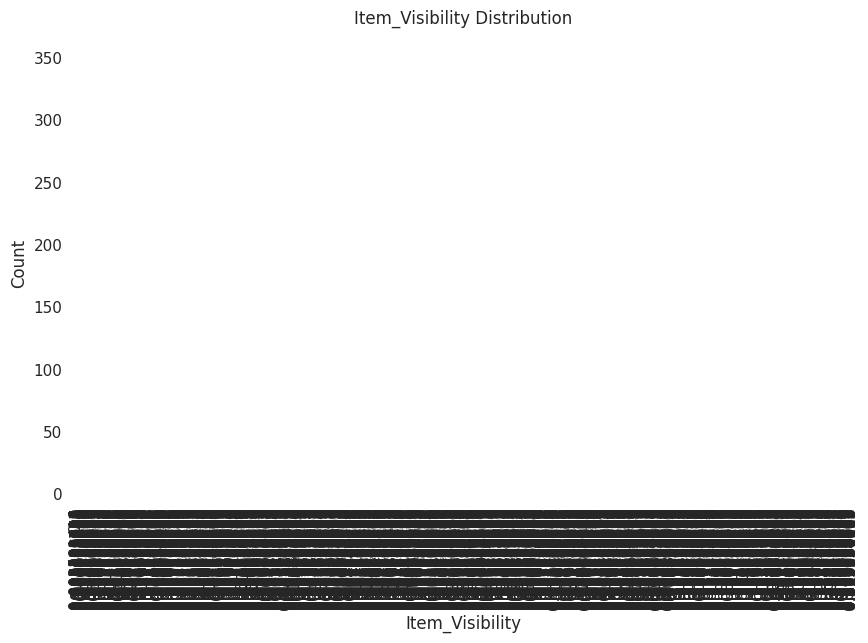

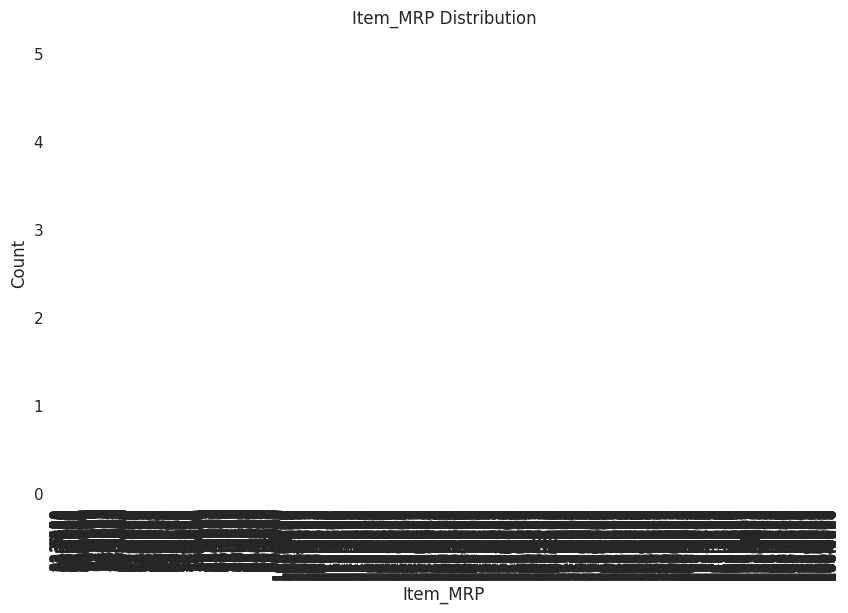

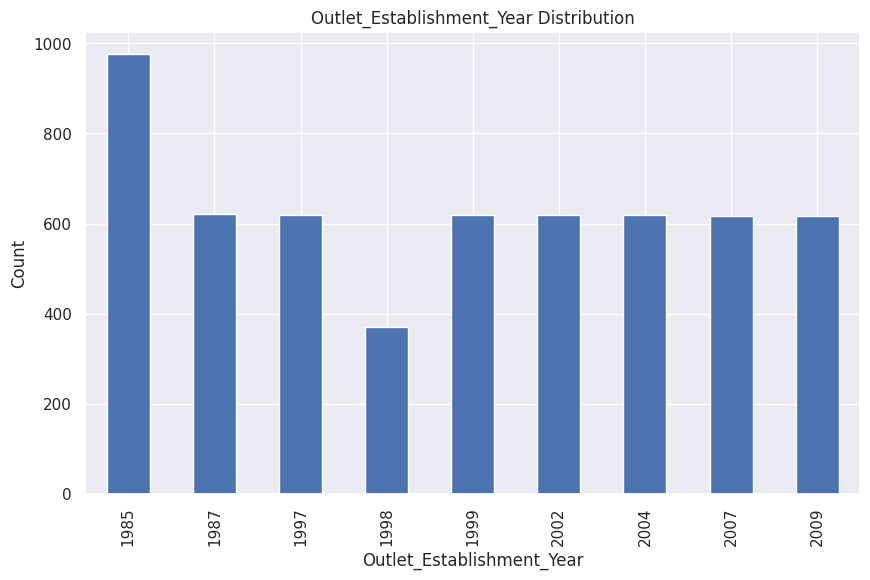

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
# Loop through the columns and create a bar graph for each
for column in data.columns:
    # Skip non-numeric columns to avoid errors
    if data[column].dtype in ['int64', 'float64']:
        plt.figure(figsize=(10, 6))
        data[column].value_counts().sort_index().plot(kind='bar')
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.show()


Mean Squared Error: 3627.77
Accuracy: 0.00


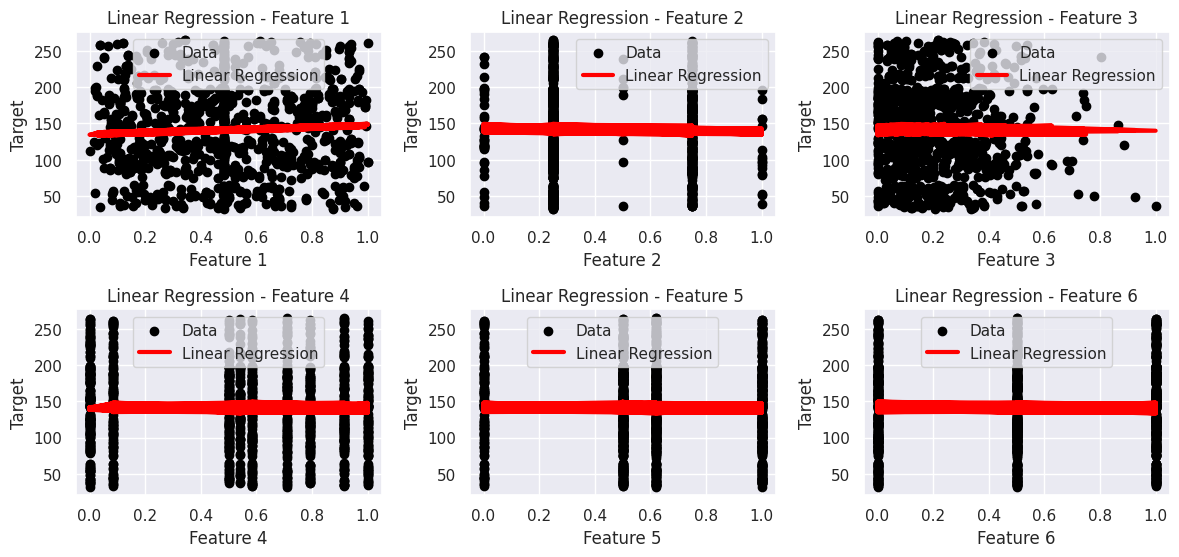

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns  # Import seaborn for heatmap
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# Assuming df is your DataFrame containing the data
# Assuming features is your NumPy array containing the features

# Convert features to a pandas DataFrame for imputation
features_df = pd.DataFrame(features)

# Replace NaN with a specific value or use imputation techniques
imputer = SimpleImputer(strategy='mean')
features_filled = imputer.fit_transform(features_df)

# Assuming df is your DataFrame containing the target variable 'Item_MRP'
y = df['Item_MRP']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_filled, y, test_size=0.2, random_state=42)

# Define and train the linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions
y_pred = lr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate pseudo-accuracy
threshold = 0.1  # Define your threshold value
accuracy = np.mean(np.abs(y_pred - y_test) <= threshold)
print(f'Accuracy: {accuracy:.2f}')

# Plotting
num_features = X_test.shape[1]
plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    plt.scatter(X_test[:, i], y_test, color='black', label='Data')
    plt.plot(X_test[:, i], y_pred, color='red', linewidth=3, label='Linear Regression')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.title(f'Linear Regression - Feature {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()


Mean Squared Error: 3696.78


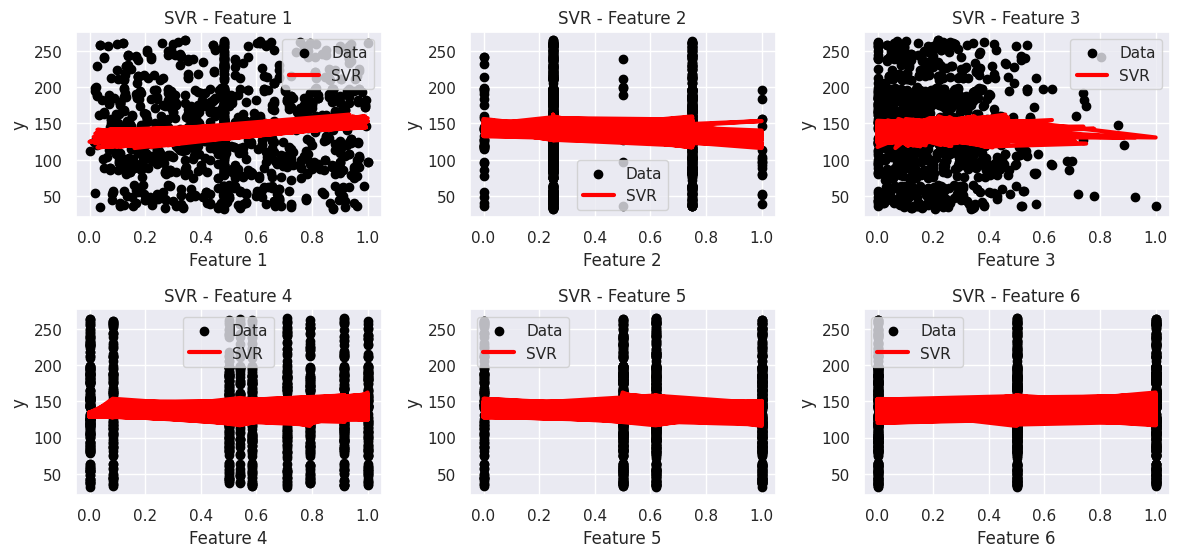

Accuracy: 0.00


In [14]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Define and train the SVR model
svr = SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1)
svr.fit(X_train, y_train)

# Make predictions
y_pred = svr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Plot the results for each feature (assuming X_test has multiple features)
num_features = X_test.shape[1]
plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    plt.scatter(X_test[:, i], y_test, color='black', label='Data')
    plt.plot(X_test[:, i], y_pred, color='red', linewidth=3, label='SVR')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('y')
    plt.title(f'SVR - Feature {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()

# Calculate pseudo-accuracy
threshold = 0.1  # Define your threshold value
accuracy = np.mean(np.abs(y_pred - y_test) <= threshold)
print(f'Accuracy: {accuracy:.2f}')


Mean Squared Error: 4363.01
R-squared (Coefficient of Determination): -0.20


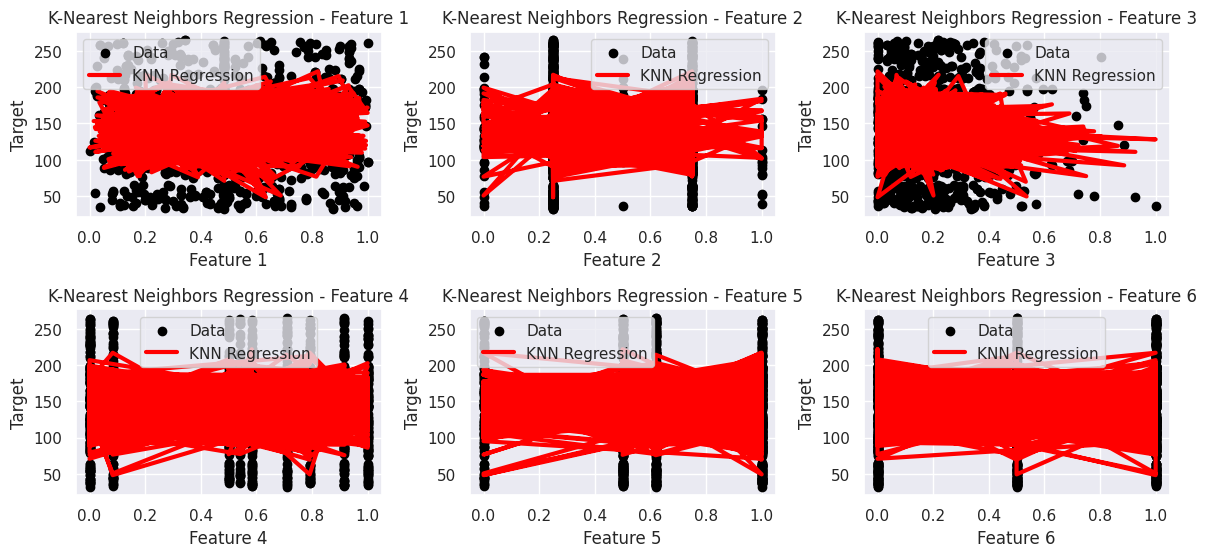

Accuracy: 1.00


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define and train the KNN regression model
knnr = KNeighborsRegressor(n_neighbors=5)
knnr.fit(X_train, y_train)

# Make predictions
y_pred = knnr.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

# Plot the results for each feature
num_features = X_test.shape[1]
plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    plt.scatter(X_test[:, i], y_test, color='black', label='Data')
    plt.plot(X_test[:, i], y_pred, color='red', linewidth=3, label='KNN Regression')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.title(f'K-Nearest Neighbors Regression - Feature {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()

# Define a threshold for "accuracy" calculation
threshold = 10000

# Calculate pseudo-accuracy
accuracy = np.mean(np.abs(y_pred - y_test) <= threshold)
print(f'Accuracy: {accuracy:.2f}')


Mean Squared Error: 3512.40
R-squared (Coefficient of Determination): 0.03
Accuracy: 1.00


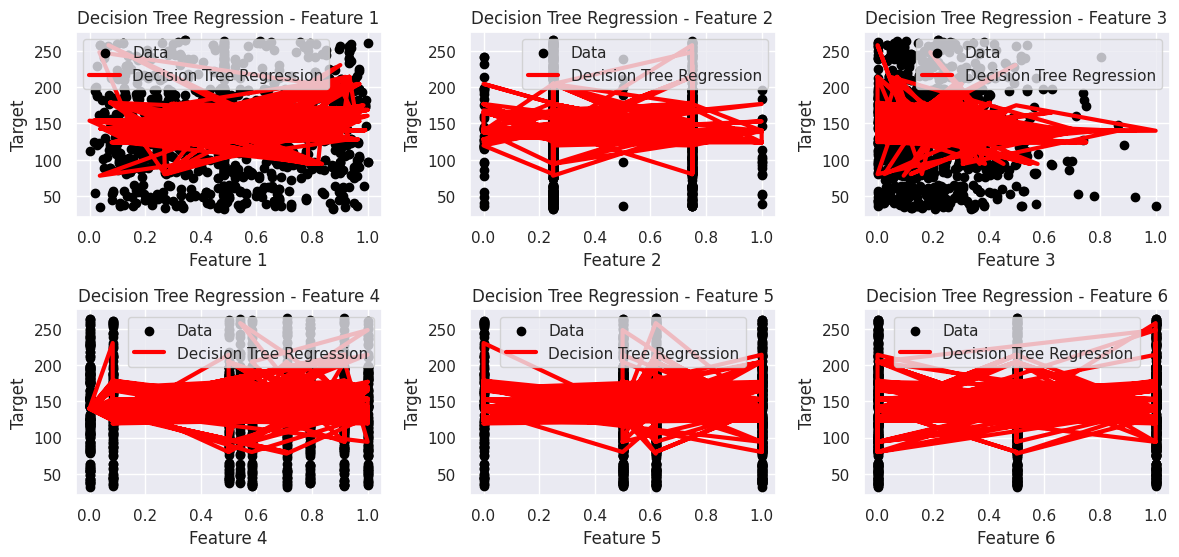

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Define and train the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(max_depth=5)  # Adjust max_depth as needed
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

# Calculate accuracy (for demonstration purposes only)
threshold = 10000  # Define a threshold for "accuracy" calculation
accuracy = np.mean(np.abs(y_pred - y_test) <= threshold)
print(f'Accuracy: {accuracy:.2f}')

# Plot the results for each feature
num_features = X_test.shape[1]
plt.figure(figsize=(12, 8))
for i in range(num_features):
    plt.subplot(3, 3, i + 1)  # Adjust the subplot layout as needed
    plt.scatter(X_test[:, i], y_test, color='black', label='Data')
    plt.plot(X_test[:, i], y_pred, color='red', linewidth=3, label='Decision Tree Regression')
    plt.xlabel(f'Feature {i+1}')
    plt.ylabel('Target')
    plt.title(f'Decision Tree Regression - Feature {i+1}')
    plt.legend()
plt.tight_layout()
plt.show()


Mean Squared Error: 3512.40
R-squared (Coefficient of Determination): 0.03


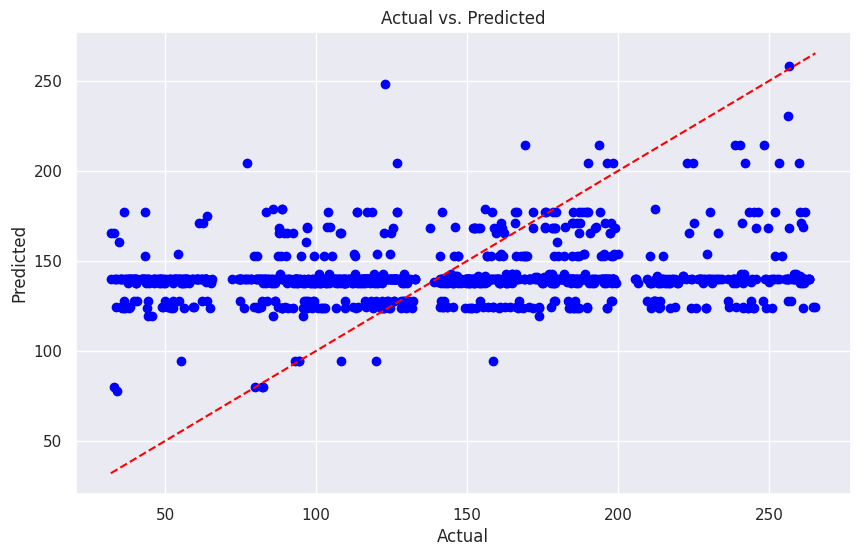

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are already defined

# Define and train the Decision Tree Regression model
dt_regressor = DecisionTreeRegressor(max_depth=5)  # Adjust max_depth as needed
dt_regressor.fit(X_train, y_train)

# Make predictions
y_pred = dt_regressor.predict(X_test)

# Calculate mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared (coefficient of determination)
r2 = r2_score(y_test, y_pred)
print(f"R-squared (Coefficient of Determination): {r2:.2f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs. Predicted')
plt.show()


In [32]:
# Drop rows with NaN values from both X_test_df_imputed and y_test simultaneously
nan_rows = X_test_df_imputed.isnull().any(axis=1) | y_test.isnull()
X_test_df_imputed = X_test_df_imputed[~nan_rows]
y_test = y_test[~nan_rows]

# Ensure that y_test contains no NaN values
if y_test.isnull().sum() > 0:
    raise ValueError("y_test contains NaN values after dropping rows with NaN values.")

In [34]:
# Print rows with NaN values in y_test
nan_indices = y_test[y_test.isnull()].index
print("Rows with NaN values in y_test:")
print(y_test.loc[nan_indices])


Rows with NaN values in y_test:
0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
1132   NaN
1133   NaN
1134   NaN
1135   NaN
1136   NaN
Name: Item_MRP, Length: 888, dtype: float64


In [36]:
import numpy as np
from sklearn.metrics import confusion_matrix

# Assuming y_test_categories contains the actual sales categories and y_pred_categories contains predicted categories
# Example categories: low, medium, high
y_test_categories = np.where(y_test < 200, 'Low', np.where(y_test < 500, 'Medium', 'High'))
y_pred_categories = np.where(y_pred < 200, 'Low', np.where(y_pred < 500, 'Medium', 'High'))

# Create confusion matrix
conf_matrix = confusion_matrix(y_test_categories, y_pred_categories, labels=['Low', 'Medium', 'High'])

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
[[199   4   0]
 [ 45   1   0]
 [875  13   0]]
